# Braintracer Analysis
Braintracer extends the functionality of cellfinder and brainreg. It takes the downsampled data, registered atlas, and positive cell coordinates, scales them down to downsampled space and assigns them to corresponding atlas brain areas, cleanly displaying the results from multiple datasets.

In [ ]:
import braintracer.file_management as btf
import braintracer.analysis as bt
import braintracer.plotting as btp
import matplotlib.pyplot as plt

In [ ]:
bt.debug = False # False by default
bt.grouped = True # True by default, set to False if you only have one group
bt.starter_region = 'IO' # You must set a starter region to use some features

In [ ]:
# provide the name, group, channel 1 name, channel 2 name
bt.Dataset('FR190', 'LS', 'r', 'g');
#bt.Dataset('FR195', 'LS', 'r', 'g');
#bt.Dataset('FR197', 'LV', 'r', 'g', modify_starter=True); # modify starter region registration upon initialisation
#bt.Dataset('FR198', 'LS', 'r', 'g');
#bt.Dataset('FR199', 'LV', 'r', 'g');
#bt.Dataset('FR200', 'LS', 'r', 'g');
title = '_'.join([i.name for i in bt.datasets])

In [ ]:
bt.datasets[0].assess_performance('groundtruth_FR190_001.xml', xy_tol=20, z_tol=20)

In [4]:
# returns number of cells in channel 2 (True is channel 1, None is both channels)
bt.datasets[0].num_cells(ch1=False) 

38

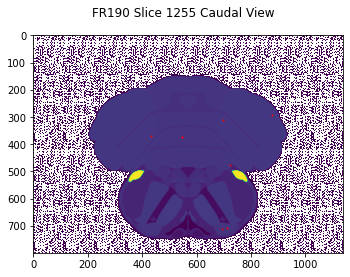

In [5]:
bt.datasets[0].show_coronal_section((0, 2776), cells_pm=10, ch1=None)
#btf.save(f'{title}_inj_section_g', as_type='png')

In [6]:
# used to ensure that the cells you are looking for are fully inside the registered starter area
#btp._generate_starter_validation_plot(padding=20)

In [7]:
# use this function if you want to modify the registration of the starter region
#bt.datasets[0].adapt_starter_area((452+175, 452+225), (627+90, 627+125), (1098+100, 1098+180))

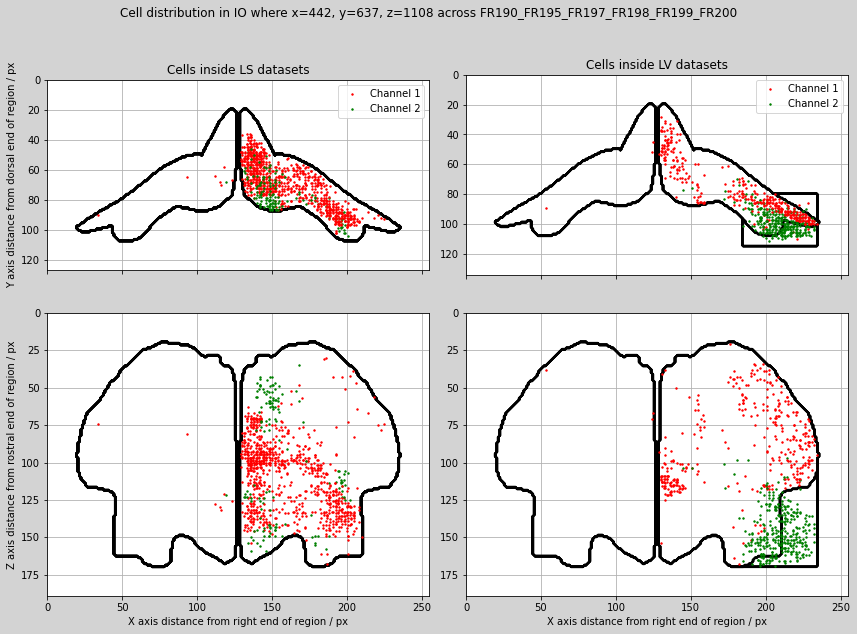

In [8]:
# general function for projecting any area and comparing cell distributions across groups
btp.generate_projection_plot('IO', include_surrounding=False, padding=20)
#btf.save(f'IO_{title}_comparison', as_type='png')

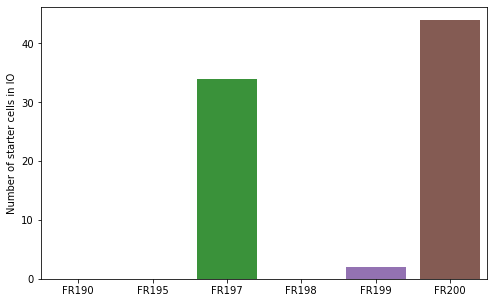

In [9]:
btp.generate_starter_cell_plot(xy_tol_um=40, z_tol_um=40)

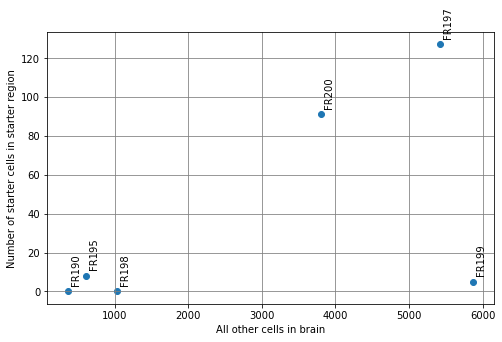

In [10]:
btp.generate_starter_cell_scatter(xy_tol_um=100, z_tol_um=100)
#btf.save('starter_vs_all_cells', as_type='png')

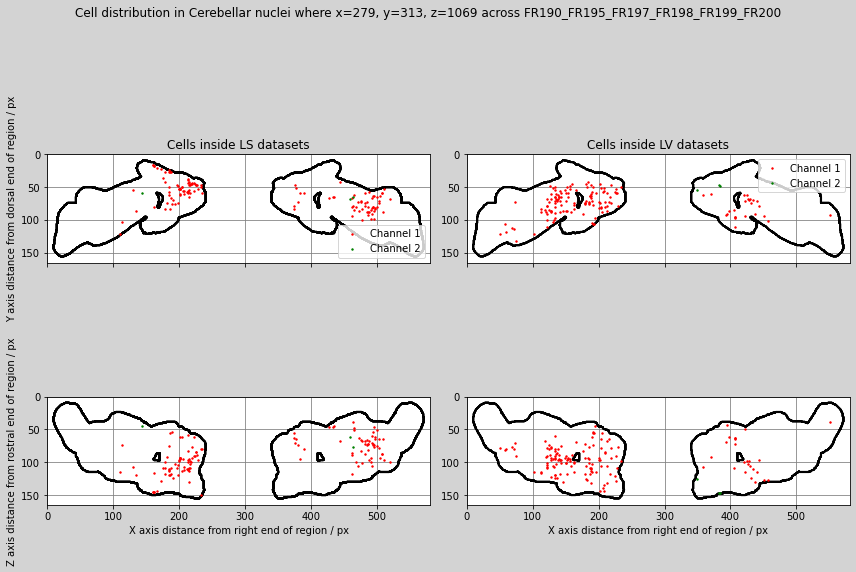

In [11]:
btp.generate_projection_plot('Cerebellar nuclei')
#btf.save(f'CbN_{title}', as_type='pdf')

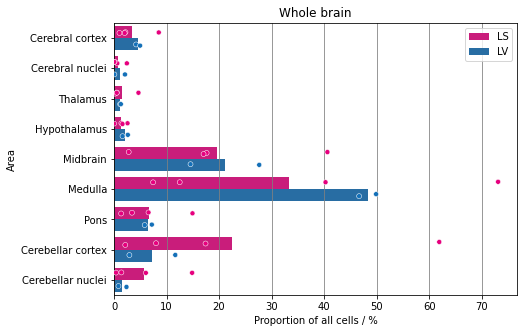

In [12]:
btp.generate_summary_plot()
#btf.save(f'summary_{title}', as_type='pdf')

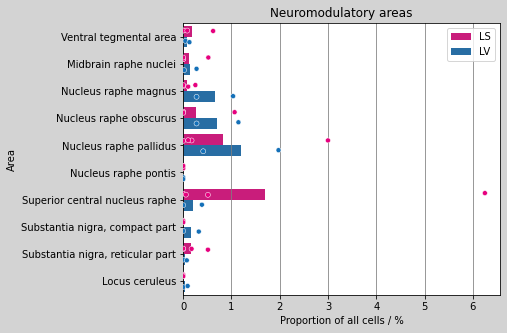

In [13]:
mod_areas = ['VTA','RAmb', 'RM', 'RO', 'RPA', 'RPO', 'CS', 'SNc', 'SNr', 'LC']
btp.generate_custom_plot(mod_areas, title='Neuromodulatory areas')
#btf.save(f'neuromodulation_{title}', as_type='pdf')

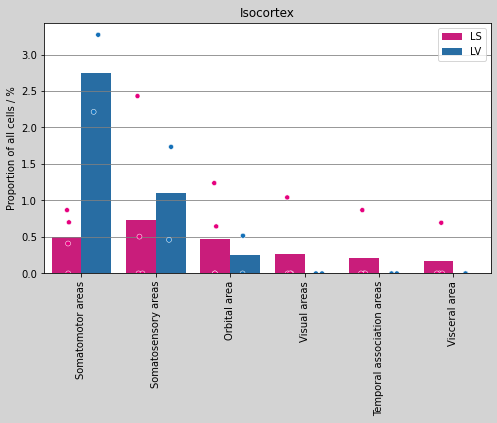

In [14]:
btp.generate_zoom_plot('Isocortex', depth=1, threshold=0.1)
#btf.save(f'isocortex_zoom_{title}', as_type='pdf')

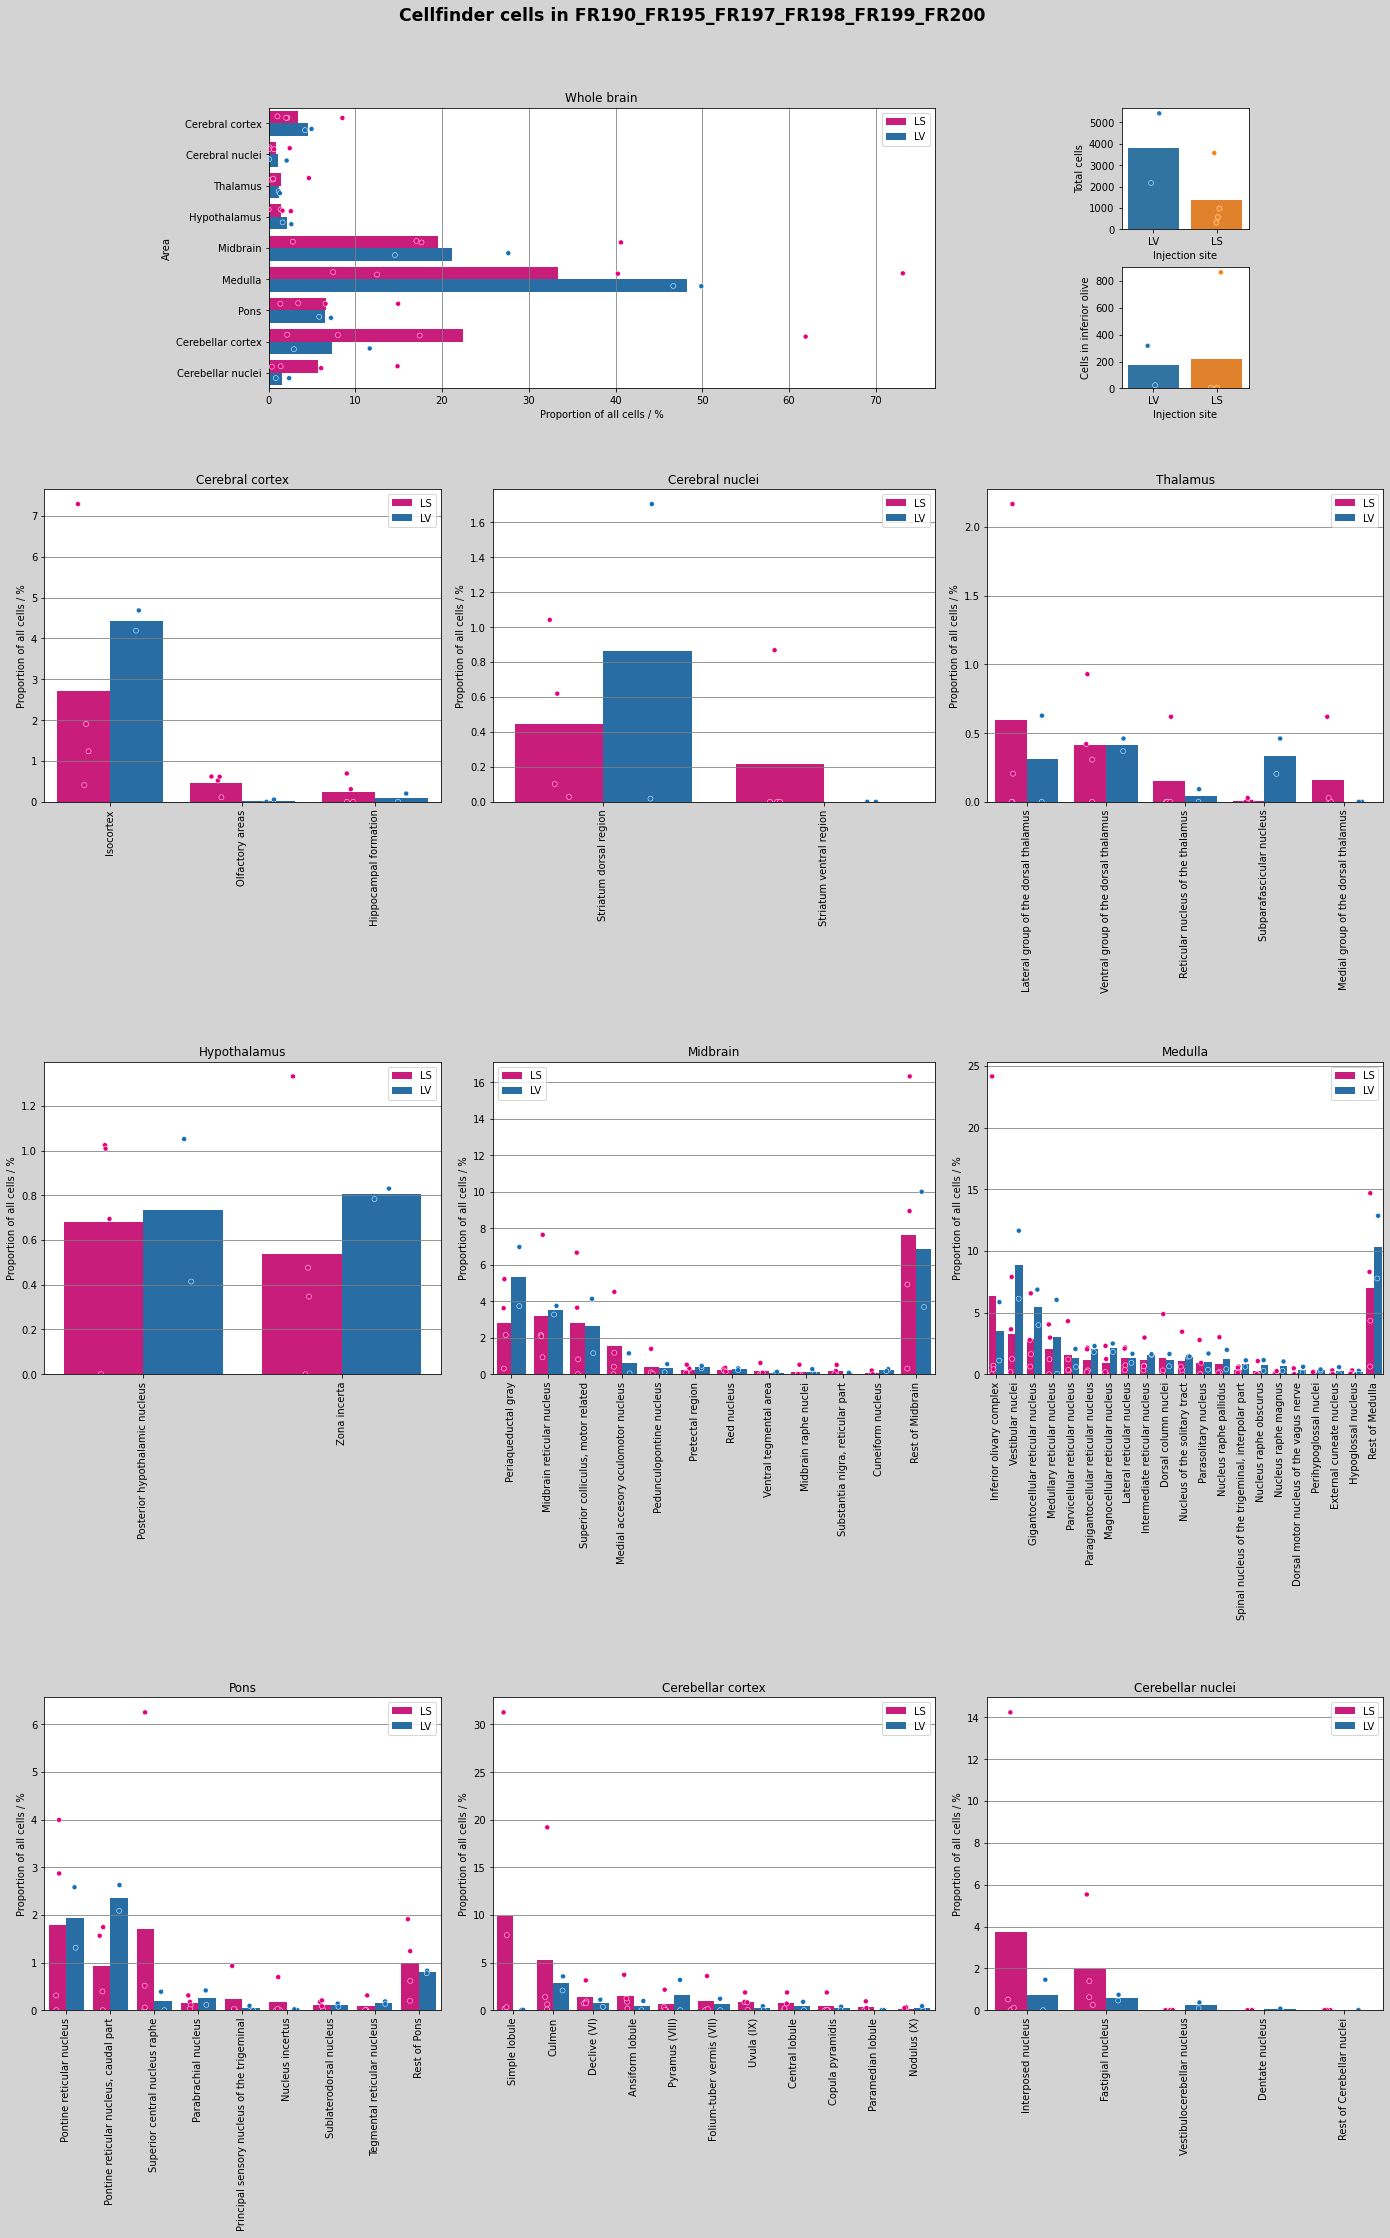

In [15]:
btp.generate_mega_overview_figure(f'Cellfinder cells in {title}')
#btf.save(f'areas_overview_{title}_ungrouped', as_type='pdf')